In [2]:
!pip install pandas
!pip install pandas_datareader
!pip install matplotlib
!pip install statsmodels
!pip install numpy
!pip install datetime
!pip install pandas_ta
!pip install yfinance
# !pip install warnings

In [3]:
### All package need

In [4]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

# html에서 해당 값을 불러오는 pd.read_html
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

sp500['Symbol'] =sp500['Symbol'].str.replace('.','-')

symbols_list = sp500['Symbol'].unique().tolist()

end_date = '2023-09-27'

#현재 시간보다 8년 전 데이터까지의 범위 설정
start_date = pd.to_datetime(end_date) - pd.DateOffset(365*8)
start_date
df = yf.download(tickers = symbols_list,
                start = start_date,
                end=end_date)
df

[*********************100%%**********************]  503 of 503 completed


1 Failed download:
['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1443499200, endDate = 1695787200")


Adj Close                                                 \
                     A        AAL        AAPL        ABBV        ABNB   
Date                                                                    
2015-09-29   31.588036  37.361614   24.716068   37.024628         NaN   
2015-09-30   32.140404  37.027863   24.997089   38.160831         NaN   
2015-10-01   31.588036  37.380692   24.833912   38.665798         NaN   
2015-10-02   32.458729  36.837143   25.015215   39.149742         NaN   
2015-10-05   33.085991  38.324745   25.105865   39.752911         NaN   
...                ...        ...         ...         ...         ...   
2023-09-20  112.243698  13.060000  175.259109  152.087677  138.009995   
2023-09-21  109.509209  13.060000  173.701157  151.909454  132.750000   
2023-09-22  111.185829  12.900000  174.560013  151.226303  132.199997   
2023-09-25  111.714767  12.910000  175.848328  153.117371  134.139999   
2023-09-26  110.507202  12.700000  171.733749  152.384705  132.279999   

                                                                      ...  \
                  ABT       ACGL         ACN        ADBE         ADI  ...   
Date                                                                  ...   
2015-09-29  33.807278  24.416668   84.097504   79.830002   45.767231  ...   
2015-09-30  34.423508  24.490000   85.542671   82.220001   47.765575  ...   
2015-10-01  34.885685  24.463333   85.699356   83.750000   46.520847  ...   
2015-10-02  35.416328  24.780001   86.526413   83.989998   47.155903  ...   
2015-10-05  35.424873  24.993334   88.467804   85.839996   48.629261  ...   
...               ...        ...         ...         ...         ...  ...   
2023-09-20  99.727936  81.320000  315.491486  535.780029  176.080002  ...   
2023-09-21  98.385368  80.290001  310.711334  513.880005  173.839996  ...   
2023-09-22  97.609665  80.959999  314.784424  512.900024  175.479996  ...   
2023-09-25  96.933411  81.150002  315.680695  511.600006  175.429993  ...   
2023-09-26  95.700241  81.260002  309.327057  506.299988  172.339996  ...   

              Volume                                                         \
                WYNN      XEL       XOM     XRAY      XYL      YUM      ZBH   
Date                                                                          
2015-09-29   6223400  3361700  13754400  1073500  1344100  6018857  2358906   
2015-09-30   4265300  2722000  18176500  1558100  1708500  7378142  2012723   
2015-10-01   4745600  2875200  14397800  1378600  1498600  4426718  1604019   
2015-10-02  15153700  3299500  18811300  1791800  1451100  7719772  1353626   
2015-10-05  12699700  5369400  18486700  2245000  2376800  5737736  1352081   
...              ...      ...       ...      ...      ...      ...      ...   
2023-09-20   1061300  7670600  11879900  1290100  1752100  1437200  1055900   
2023-09-21   2358400  4904800  14400600  2143400  2044800  1492700  1489200   
2023-09-22   2611300  4904300  13197300  3712600  1699800  1534100  1267300   
2023-09-25   1387800  3617800  11316000  1957800  1702000  1048500   886700   
2023-09-26   1454000  6275500  11805400  1827800  1322400  1500600  3610500   

                                      
              ZBRA     ZION      ZTS  
Date                                  
2015-09-29  895000  2958200  7328400  
2015-09-30  618800  3514200  4954100  
2015-10-01  464900  2795500  4131800  
2015-10-02  341500  3315700  4036800  
2015-10-05  460600  1924800  5467700  
...            ...      ...      ...  
2023-09-20  824900  1847200  1485500  
2023-09-21  676200  3054300  1691800  
2023-09-22  482200  2364000  1281800  
2023-09-25  314500  1370600  1551100  
2023-09-26  355400  1586100  1463200  

[2012 rows x 3018 columns]

In [5]:
save_df = df
df.stack()
df =df.stack()
df.index.names = ['date', 'ticker']
df.columns = df.columns.str.lower()

# setting the data formet
df

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.588036   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361614   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.716068   27.264999   28.377501   26.965000   28.207500   
           ABBV     37.024628   52.790001   54.189999   51.880001   53.099998   
           ABT      33.807278   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     124.010002  124.010002  124.739998  123.449997  124.239998   
           ZBH     112.216316  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.581326   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.447540  176.869995  178.449997  176.270004  176.580002   

                        volume  
date       ticker               
2015-09-29 A         2252400.0  
           AAL       7478800.0  
           AAPL    293461600.0  
           ABBV     12842800.0  
           ABT      12287500.0  
...                        ...  
2023-09-26 YUM       1500600.0  
           ZBH       3610500.0  
           ZBRA       355400.0  
           ZION      1586100.0  
           ZTS       1463200.0  

[994088 rows x 6 columns]

# 2. Calculate features and technical indicators for each stock.

- Garman-Klass Colatility
- RSI
- Bollinger Bands
- ATR
- MACD
- Dollar Volume


In [6]:
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close']) -np.log(df['open']))**2)

df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))
  
df

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.588036   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361614   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.716068   27.264999   28.377501   26.965000   28.207500   
           ABBV     37.024628   52.790001   54.189999   51.880001   53.099998   
           ABT      33.807278   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     124.010002  124.010002  124.739998  123.449997  124.239998   
           ZBH     112.216316  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.581326   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.447540  176.869995  178.449997  176.270004  176.580002   

                        volume  garman_klass_vol        rsi  
date       ticker                                            
2015-09-29 A         2252400.0         -0.000854        NaN  
           AAL       7478800.0         -0.000443        NaN  
           AAPL    293461600.0         -0.005441        NaN  
           ABBV     12842800.0         -0.049280        NaN  
           ABT      12287500.0         -0.008237        NaN  
...                        ...               ...        ...  
2023-09-26 YUM       1500600.0          0.000053  36.057176  
           ZBH       3610500.0          0.000224  31.893246  
           ZBRA       355400.0          0.000133  29.494977  
           ZION      1586100.0          0.000292  46.707775  
           ZTS       1463200.0          0.000075  42.623483  

[994088 rows x 8 columns]

<Axes: xlabel='date'>

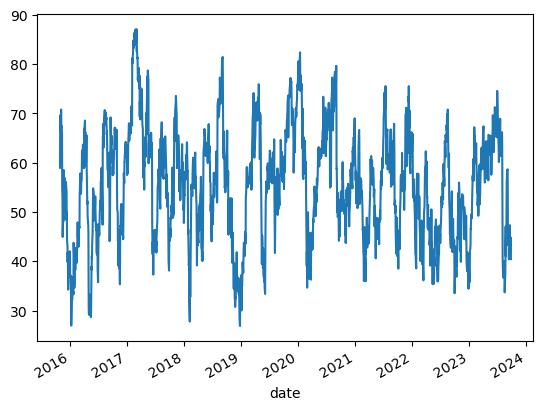

In [7]:
df.xs('AAPL', level=1)['rsi'].plot()

In [8]:
df['bb_low'] = df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 0])

df['bb_mid'] = df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 1])

df['bb_high'] = df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 2])
df

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.588036   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361614   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.716068   27.264999   28.377501   26.965000   28.207500   
           ABBV     37.024628   52.790001   54.189999   51.880001   53.099998   
           ABT      33.807278   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     124.010002  124.010002  124.739998  123.449997  124.239998   
           ZBH     112.216316  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.581326   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.447540  176.869995  178.449997  176.270004  176.580002   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.000854        NaN       NaN   
           AAL       7478800.0         -0.000443        NaN       NaN   
           AAPL    293461600.0         -0.005441        NaN       NaN   
           ABBV     12842800.0         -0.049280        NaN       NaN   
           ABT      12287500.0         -0.008237        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 YUM       1500600.0          0.000053  36.057176  4.826202   
           ZBH       3610500.0          0.000224  31.893246  4.751923   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZION      1586100.0          0.000292  46.707775  3.527329   
           ZTS       1463200.0          0.000075  42.623483  5.161192   

                     bb_mid   bb_high  
date       ticker                      
2015-09-29 A            NaN       NaN  
           AAL          NaN       NaN  
           AAPL         NaN       NaN  
           ABBV         NaN       NaN  
           ABT          NaN       NaN  
...                     ...       ...  
2023-09-26 YUM     4.856171  4.886139  
           ZBH     4.791592  4.831260  
           ZBRA    5.539167  5.677342  
           ZION    3.582765  3.638202  
           ZTS     5.220007  5.278822  

[994088 rows x 11 columns]

In [9]:
pandas_ta.atr(high=df['high'],
             low = df['low'],
             close = df['close'],
             length=14)

date        ticker
2015-09-29  A                NaN
            AAL              NaN
            AAPL             NaN
            ABBV             NaN
            ABT              NaN
                         ...    
2023-09-26  YUM        98.580840
            ZBH        92.367209
            ZBRA       93.925979
            ZION      100.796981
            ZTS       103.915768
Name: ATRr_14, Length: 994088, dtype: float64

In [10]:
# Error code
# def compute_atr(stock_data):
#     atr = pandas_ta.atr(high=df['high'],
#                  low = df['low'],
#                  close = df['close'],
#                  length=14)
#     return atr.sub(atr.mean()).div(atr.std())

# df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

# def compute_macd(close):
#     macd = pandas_ta.macd(close=close, length=10).iloc[:, 0]
#     return macd.sub(macd.mean()).div(macd.std())


# df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)
# ______________________________



df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)

df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])
                                                          
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
                                                          
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])

def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)

df['dollar_volume'] = (df['adj close']*df['volume'])/1e6

df

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.588036   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361614   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.716068   27.264999   28.377501   26.965000   28.207500   
           ABBV     37.024628   52.790001   54.189999   51.880001   53.099998   
           ABT      33.807278   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     124.010002  124.010002  124.739998  123.449997  124.239998   
           ZBH     112.216316  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.581326   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.447540  176.869995  178.449997  176.270004  176.580002   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.000854        NaN       NaN   
           AAL       7478800.0         -0.000443        NaN       NaN   
           AAPL    293461600.0         -0.005441        NaN       NaN   
           ABBV     12842800.0         -0.049280        NaN       NaN   
           ABT      12287500.0         -0.008237        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 YUM       1500600.0          0.000053  36.057176  4.826202   
           ZBH       3610500.0          0.000224  31.893246  4.751923   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZION      1586100.0          0.000292  46.707775  3.527329   
           ZTS       1463200.0          0.000075  42.623483  5.161192   

                     bb_mid   bb_high       atr      macd  dollar_volume  
date       ticker                                                         
2015-09-29 A            NaN       NaN       NaN       NaN      71.148891  
           AAL          NaN       NaN       NaN       NaN     279.420040  
           AAPL         NaN       NaN       NaN       NaN    7253.216940  
           ABBV         NaN       NaN       NaN       NaN     475.499888  
           ABT          NaN       NaN       NaN       NaN     415.406924  
...                     ...       ...       ...       ...            ...  
2023-09-26 YUM     4.856171  4.886139  0.142547 -1.363696     186.089409  
           ZBH     4.791592  4.831260 -0.381708 -0.881067     405.157010  
           ZBRA    5.539167  5.677342 -0.057389 -1.600791      79.595386  
           ZION    3.582765  3.638202 -0.161699 -0.164625      53.263340  
           ZTS     5.220007  5.278822  0.651515 -1.188278     258.178041  

[994088 rows x 14 columns]

# 3. Aggregate to monthly level and filter top 150 most liquid stocks for each month.

 - To reduce tradining time and experiment with features and strategies, we convert the business-daily data to month-end frequency.
 

In [27]:
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open', 'high', 'low', 'close']]
# last_cols

# error code
# data=pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),
# df.unstack()[last_cols].resample('M').last().stack('ticker')],axis=1)

data = (pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),
                   df.unstack()[last_cols].resample('M').last().stack('ticker')],
                  axis=1)).dropna()


data

dollar_volume   adj close       atr   bb_high    bb_low  \
date       ticker                                                            
2015-11-30 A          136.444141   39.152683 -1.033887  3.694119  3.549210   
           AAL        287.915778   39.429932  0.190822  3.827635  3.672028   
           AAPL      4034.583544   26.924877 -0.967900  3.370842  3.284211   
           ABBV       343.971772   41.160305 -0.526809  3.841588  3.745051   
           ABT        213.736340   38.669388 -1.064842  3.709289  3.665571   
...                          ...         ...       ...       ...       ...   
2023-09-30 OTIS       156.200745   79.290001 -1.028320  4.472419  4.381831   
           ABNB      1633.500725  132.279999 -1.006939  5.024801  4.857047   
           CEG        197.815385  108.489998 -0.436215  4.738248  4.657897   
           GEHC       212.434213   66.179550 -0.893478  4.271243  4.156170   
           KVUE       684.902631   20.426666 -0.899746  3.184098  3.034066   

                     bb_mid  garman_klass_vol      macd        rsi  
date       ticker                                                   
2015-11-30 A       3.621664         -0.001810  0.567157  73.421404  
           AAL     3.749832         -0.000966 -0.418772  40.718985  
           AAPL    3.327527         -0.003119 -0.142789  55.537378  
           ABBV    3.793320         -0.053947  0.145677  49.376869  
           ABT     3.687430         -0.009962  0.335556  56.962531  
...                     ...               ...       ...        ...  
2023-09-30 OTIS    4.427125          0.000093 -1.534536  33.116257  
           ABNB    4.940924          0.000213 -0.037854  44.494127  
           CEG     4.698072          0.000274  0.366876  55.245471  
           GEHC    4.213706          0.000185 -1.116463  40.922331  
           KVUE    3.109082          0.000136 -1.435621  35.706317  

[46937 rows x 9 columns]

In [29]:
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())

data['dollar_vol_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending=False))

data = data[data['dollar_vol_rank']<150].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)

data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2021-09-30 AAL      20.520000 -0.738162  3.123005  2.973136  3.048070   
           AAPL    139.697632  0.506848  5.051831  4.930969  4.991400   
           ABBV     98.598106 -0.054034  4.631010  4.574080  4.602545   
           ABT     113.463776  0.380102  4.854178  4.744244  4.799211   
           ACN     309.758667  0.547113  5.831624  5.747860  5.789742   
...                       ...       ...       ...       ...       ...   
2023-09-30 WDC      44.270000 -1.453393  3.860224  3.753636  3.806930   
           WFC      40.290813 -0.558742  3.790225  3.709473  3.749849   
           WMT     162.500000 -0.196379  5.116986  5.081613  5.099300   
           WYNN     90.680000 -1.348097  4.636063  4.504446  4.570255   
           XOM     116.410004  0.601335  4.793504  4.713293  4.753399   

                   garman_klass_vol      macd        rsi  
date       ticker                                         
2021-09-30 AAL             0.000184  0.477811  51.367834  
           AAPL           -0.000067 -1.109594  41.000037  
           ABBV           -0.003736 -1.286151  41.755553  
           ABT            -0.000930 -1.330510  35.605562  
           ACN            -0.000556 -0.518881  41.108492  
...                             ...       ...        ...  
2023-09-30 WDC             0.000366  0.486264  55.763715  
           WFC             0.000136 -0.282325  40.920284  
           WMT             0.000024  0.399459  54.722508  
           WYNN            0.000142 -0.693417  36.293527  
           XOM             0.000045  1.400623  59.440192  

[3725 rows x 8 columns]

# Calculate Monthly Returns for different time horizons as features.

 - To capture time series dynamics that reflect, for example, momenthum patterns, we compute historical returns using the method. pct_chabnge(lag), that is returns over various monthly periods as identified by lags.

In [35]:
def calculate_return(df):

    outlier_cutoff = 0.005

    lags = [1,2,3,6,9,12]

    for lag in lags:
        df[f'return_{lag}m'] = (df['adj close']
                              .pct_change(lag)
                              .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff)
                                                     ,upper=x.quantile(1-outlier_cutoff)
                                                    ))
                              .add(1)
                              .pow(1/lag)
                              .sub(1))
    return df

data = data.groupby(level=1, group_keys=False).apply(calculate_return).dropna()

data


adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2022-09-30 AAL      12.040000 -1.210032  2.775911  2.540830  2.658370   
           AAPL    137.204208  1.823015  5.095866  4.959336  5.027601   
           ABBV    127.699333  1.488993  4.942068  4.868171  4.905120   
           ABT      94.416801  0.641577  4.683877  4.551494  4.617686   
           ACN     252.154663  1.137923  5.681152  5.502479  5.591816   
...                       ...       ...       ...       ...       ...   
2023-09-30 WDC      44.270000 -1.453393  3.860224  3.753636  3.806930   
           WFC      40.290813 -0.558742  3.790225  3.709473  3.749849   
           WMT     162.500000 -0.196379  5.116986  5.081613  5.099300   
           WYNN     90.680000 -1.348097  4.636063  4.504446  4.570255   
           XOM     116.410004  0.601335  4.793504  4.713293  4.753399   

                   garman_klass_vol      macd        rsi  return_1m  \
date       ticker                                                     
2022-09-30 AAL             0.000489 -0.486908  39.754119  -0.073133   
           AAPL            0.000327 -2.384541  33.512107  -0.120977   
           ABBV           -0.002695 -0.283117  39.963546  -0.001859   
           ABT            -0.000348 -2.144357  32.795417  -0.057379   
           ACN             0.000117 -3.012552  32.289169  -0.108022   
...                             ...       ...        ...        ...   
2023-09-30 WDC             0.000366  0.486264  55.763715  -0.016222   
           WFC             0.000136 -0.282325  40.920284  -0.015500   
           WMT             0.000024  0.399459  54.722508  -0.000676   
           WYNN            0.000142 -0.693417  36.293527  -0.105543   
           XOM             0.000045  1.400623  59.440192   0.046947   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2022-09-30 AAL     -0.062881  -0.017116  -0.065994  -0.043462   -0.042473  
           AAPL    -0.077183   0.004060  -0.037768  -0.027021   -0.001500  
           ABBV    -0.032945  -0.040096  -0.027999   0.002143    0.021786  
           ABT     -0.057126  -0.036473  -0.031668  -0.038464   -0.015197  
           ACN     -0.083411  -0.023899  -0.043046  -0.048481   -0.017000  
...                      ...        ...        ...        ...         ...  
2023-09-30 WDC      0.019891   0.052872   0.027272   0.037334    0.024838  
           WFC     -0.057917  -0.013554   0.016425   0.000702    0.003255  
           WMT      0.010014   0.012354   0.017574   0.016553    0.020256  
           WYNN    -0.086611  -0.048699  -0.033662   0.011152    0.031196  
           XOM      0.046139   0.030496   0.012838   0.008747    0.027037  

[1899 rows x 14 columns]